## Linear Regression
 
 Here, we have some deals data for various restaurants and bars in Philadelphia area.
 
### The individual bar/restaurant are trying to decide the deals to put forth to restaurant.


Import Statements

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import REGRESSION

# Read data into dataframe 
#### Get the price csv file from the company. It has deal and price info.

In [31]:
restaurant = pd.read_csv("DATASET1.csv")

## Peek at the data
Sample Point of Sales data



In [32]:
restaurant.head()

,Menu Item,Avg. Sales Per Hr,Deal Percent,Target Sales Per Hr,Length of Deal,Monthly Sales,CrowdSize,DealCount
0,Violet,39.577668,12.655651,34.497268,4.082621,587.951054,58,7
1,DarkGreen,37.268959,11.109461,31.926272,2.664034,392.204933,46,19
2,Bisque,37.110597,11.330278,33.000915,4.104543,487.547505,43,14
3,SaddleBrown,36.721283,13.717514,34.305557,3.120179,581.852344,10,9
4,MediumAquaMarine,37.536653,12.795189,33.330673,4.446308,599.406092,6,17


## Some basic statistics of our data
Note: This is just a sample data created using random values

In [33]:
restaurant.describe()

,Avg. Sales Per Hr,Deal Percent,Target Sales Per Hr,Length of Deal,Monthly Sales,CrowdSize,DealCount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,37.060445,12.052488,33.053194,3.533462,499.314038,31.854000,11.758000
std,1.010489,0.994216,0.992563,0.999278,79.314782,15.770291,4.315168
min,33.913847,8.508152,29.532429,0.269901,256.670582,5.000000,5.000000
25%,36.349257,11.388153,32.341822,2.930450,445.038277,19.000000,8.000000
50%,37.069367,11.983231,33.082008,3.533975,498.887875,31.000000,12.000000
75%,37.716432,12.753850,33.711985,4.126502,549.313828,46.000000,15.000000
max,40.005182,15.126994,36.139662,6.922689,765.518462,59.000000,19.000000


### Data types of columns
##### Subject to change

In [34]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Menu Item              500 non-null object
Avg. Sales Per Hr      500 non-null float64
Deal Percent           500 non-null float64
Target Sales Per Hr    500 non-null float64
Length of Deal         500 non-null float64
Monthly Sales          500 non-null float64
CrowdSize              500 non-null int64
DealCount              500 non-null int64
dtypes: float64(5), int64(2), object(1)
memory usage: 29.3+ KB


# Start Data Analysis

## Lets explore data using various graphs

### Crowd Size vs. Monthly Sales

The graph below shows the nonuniformity of our data. This shows that the restaurant's crowd size and their monthly sales are not homogenous and there are other factors affecting sales more than the crowd size.

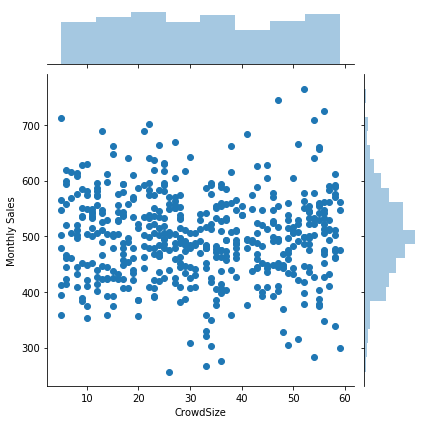

In [35]:
sns.jointplot(x='CrowdSize',y='Monthly Sales',data=restaurant)

### Deal Percentage vs Monthly Sales
This graph is more usable and shows the realtion between monthly sales and deal percent. Looks like the restaurant gets more profit when they put more deals in the range of 10-15% off.

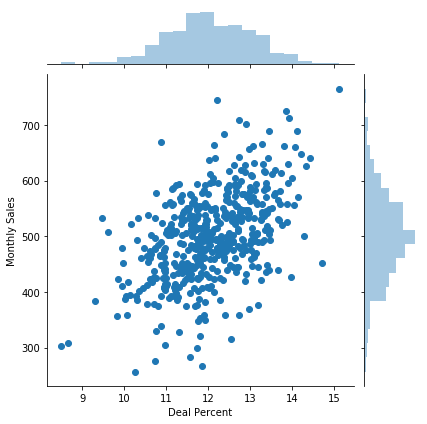

In [ ]:
sns.jointplot(x='Deal Percent',y='Monthly Sales',data=restaurant)


### Hex graph of Deal Percent vs Crowd Size
This graph is the most stable and shows the realtion between deal percent and the crowd size. We can see that the restaurant only gets more crowd when they put more deals in the range of 10-15%.

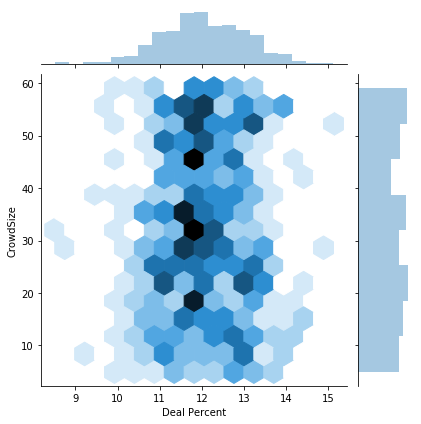

In [ ]:
sns.jointplot(x='Deal Percent',y='CrowdSize',kind='hex',data=restaurant)

### Pairplot of our data
Using the pair plot, we can see analyze the distribution and find which attributes are affecting each other. More normal distribution = Higher Dependency on each other.

### We can see that Length of Deal, Crowd Size and Deal Percent affect the Monthly Sales the most than all other attributes.


In [ ]:
sns.pairplot(restaurant)

# Analyzing Length of Deal vs Monthly Sales

Linear model plot of  Monthly Sales vs. Length of Deal.

In [ ]:
sns.lmplot(x='Length of Deal',y='Monthly Sales',data=restaurant)


## Training and Testing Data

### Split the data into training and testing sets.
Set a variable X equal to the numerical features of the restaurant and a variable y equal to the "Monthly Sales" column.


In [ ]:
y = restaurant['Monthly Sales']

X = restaurant[['Deal Percent','Avg. Sales Per Hr', 'Length of Deal', 'CrowdSize']]


Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


## Training the Model
 Train our model on our training data!

### Import our regression model

Create an instance of a LinearRegression() model named lm.

In [ ]:


lm = REGRESSION.LinearRegression()

# ** Train/fit lm on the training data.**

lm.fit(X_train,y_train)

#### Print out the coefficients of the model**

The coefficients

In [ ]:
print('Coefficients: \n', lm.coef_)

### Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!
 
#Use lm.predict() to predict off the X_test set of the data.

In [ ]:
predictions = lm.predict( X_test)

### Create a scatterplot of the real test values versus the predicted values. 


In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).
Check the metrics.

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


### Residuals

Next we plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot. As we see, our regression model acheived a normal distribution. 


In [ ]:
sns.distplot((y_test-predictions),bins=50)

In [ ]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']

## Now lets check predictions

Check predicted adjustment to current Deal Percent for our test data


## First our Deal Percent 

In [ ]:
coeffecients.loc[['Deal Percent']]

## Next the predicted sales for Menu Item 1


In [ ]:
print(predictions[0])

### Check predicted adjustment to crowdSize for current test data


In [ ]:
(coeffecients.loc[['CrowdSize']]*100).apply(np.ceil)